# Assignment 3: Non-Linear Models and Validation Metrics (50 marks total)
### Due: March 7 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (30 marks)

### *Part 1A: Decision Function* 

Building on the first part of the previous assignment, we would like to test how changing the decision boundary for a linear model impacts the results.

### Step 0: Import Libraries

In [604]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [605]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

### Step 1: Data Input (1 mark)

Load spam data using the same method as assignment 2.

In [606]:
# TO DO: Import spam dataset from yellowbrick library
from yellowbrick.datasets import load_spam

X, y = load_spam()

if (X is None or y is None):
    print("Error in loading the dataset")
else:
    print(f"The type of X is: {type(X)} and has the size: {X.size} in the shape: {X.shape}") #Based on the data set should be (4600, 57)
    print(f"The type of y is: {type(y)} and has the size: {y.size} in the shape: {y.shape}")


The type of X is: <class 'pandas.core.frame.DataFrame'> and has the size: 262200 in the shape: (4600, 57)
The type of y is: <class 'pandas.core.series.Series'> and has the size: 4600 in the shape: (4600,)


Next, we need to split the data into training and testing sets.

In [607]:
# TO DO: Split 10% of the data for the testing set (1 mark)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


### Step 2: Data Processing
Based on assignment 2, follow the same data processing steps (if needed)

In [608]:
# TO DO: Data processing steps (if needed)
missing_x = X.isnull().sum().sum()
missing_y = y.isnull().sum()

print(f"There are: {missing_x} values missing in x")
print(f"There are: {missing_y} values missing in y")

#There are no missing values, but we will fill them in just in case

X.fillna(method="ffill")
y.fillna(method="ffill")

There are: 0 values missing in x
There are: 0 values missing in y


0       1
1       1
2       1
3       1
4       1
       ..
4595    0
4596    0
4597    0
4598    0
4599    0
Name: is_spam, Length: 4600, dtype: int64

### Step 3: Implement Machine Learning Model (2 marks)

1. Import `LogisticRegression` from sklearn
1. Instantiate model `LogisticRegression(max_iter=2000)`
1. Split training data into training and validation sets (use 20% of the data for validation)
1. Train the machine learning model

In [609]:
# TO DO: Split training data into training and validation sets and fit model to training data (2 marks)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 2000, fit_intercept=False) #I set fit_intercept to False as later on when I changed the decision boundary, it was giving incorrect results with fit_intercept=True as the intercept was -1.66 and changing it to -1 increased it

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(x_train, y_train)


LogisticRegression(fit_intercept=False, max_iter=2000)

### Step 4-5: Validate Model and Visualize Results (4 marks)

Next, we can print the classification report and confusion matrix for this data set using the training and validation data.

In [610]:
# TO DO: Print classification report (1 mark)
from sklearn.metrics import classification_report

y_pred = model.predict(x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       538
           1       0.87      0.94      0.90       382

    accuracy                           0.92       920
   macro avg       0.91      0.92      0.92       920
weighted avg       0.92      0.92      0.92       920



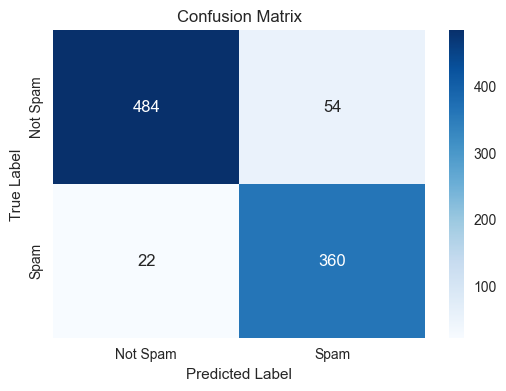

In [611]:
# TO DO: Print confusion matrix (1 mark)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)

#Using the same style as Assignment 2
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In this case, do we want to increase precision or recall? Based on your choice, select the appropriate direction to adjust the decision boundary. You can use either 1 or -1 as your new threshold, depending on your selected direction.

In [612]:
# TO DO: Predict values based on new decision function threshold and print classification report (1 mark)
# We want to catch more non-spam email, so we decrease threshold to improve its recall
model.intercept_ -= 1

y_pred = model.predict(x_val)

print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       538
           1       0.95      0.83      0.88       382

    accuracy                           0.91       920
   macro avg       0.92      0.90      0.91       920
weighted avg       0.91      0.91      0.91       920



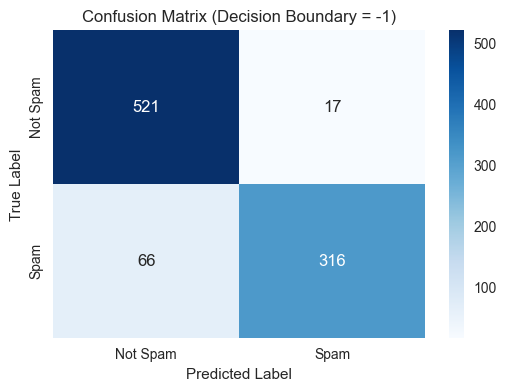

In [613]:
# TO DO: Print new confusion matrix (1 mark)
cm_new = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_new, annot=True, cmap="Blues", fmt='d', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Decision Boundary = -1)")
plt.show()

### Questions (6 marks)
1. Did you decide to move the threshold to increase recall or precision? Why?
1. How did your decision impact the number of false negatives and false positives? What is a potential unintended consequence of changing the decision boundary in this context?
1. Why did we use the validation data instead of the test data to check the new decision threshold?

#ANSWERS
1. I decided to increase recall as we are attempting to catch more "non-spam" email to decrease the important emails missed. Decreasing the threshold allows us to catch more non-spam and improve the recall as it lowers the amount of false negatives which would not be caught with a decision boundary of 0

2. As previously mentioned, this would decrease false negatives which would normally be considered as spam and now are considered non-spam. This simultaneoulsy increases false positives as it catches more spam email samples, but labels them as non-spam. The potential consequence is that now there is more spam email ending up in the user's mailbox, which is unwanted email that we do not want present.

3. We use the validation data as it is the data that we can use to tune hyperparameters in our model, such as the threshold we were trying to optimize. As the test set is meant to be data that is not previously seen by the model, if we used it to tune our hyperparameters, it would no longer be unseen data and can change our results.

### *Part 1B: Non-linear classification*

Using the spam dataset from part 1A, compare the performance of two non-linear models to the linear model used in assignment 2.

### Step 3: Implement Machine Learning Models

1. Import `LogisticRegression`, `SVC` and `RandomForestClassifier` from sklearn
2. Instantiate models as `LogisticRegression(max_iter=2000)`, `SVC()` and `RandomForestClassifier(random_state=0, max_depth=10)`
3. Implement the machine learning models using cross-validation (Step 4)

### Step 4: Validate Model 

Calculate the training and validation accuracy for the three different models mentioned in Step 3. For this case, you can use `cross_validate()` with `cv=5` and `scoring='accuracy'` to get the training and validation data for each of the three models and calculate the accuracy results.

### Step 5.1: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
1. Add the training accuracy and validation accuracy for each model to the `results` DataFrame
1. Add the model names as the index for the DataFrame
1. Print `results`

In [614]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

log_reg = LogisticRegression(max_iter = 2000)
svc = SVC()
forest = RandomForestClassifier(random_state=0, max_depth=10)

cross_val_reg = cross_validate(log_reg, x_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
cross_val_svc = cross_validate(svc, x_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
cross_val_for = cross_validate(forest, x_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# Training accuracy
log_reg_train_accuracy = cross_val_reg['train_score'].mean()
svc_train_accuracy = cross_val_svc['train_score'].mean()
forest_train_accuracy = cross_val_for['train_score'].mean()

# Validation accuracy
log_reg_val_accuracy = cross_val_reg['test_score'].mean()
svc_val_accuracy = cross_val_svc['test_score'].mean()
forest_val_accuracy = cross_val_for['test_score'].mean()

results = pd.DataFrame({
    "Model Type": ['LogisticRegression', 'SVC', 'Random Forest'],
    "Training Accuracy": [log_reg_train_accuracy, svc_train_accuracy, forest_train_accuracy],
    "Validation Accuracy": [log_reg_val_accuracy, svc_val_accuracy, forest_val_accuracy],

})

results.set_index('Model Type', inplace=True)

print(results)


                    Training Accuracy  Validation Accuracy
Model Type                                                
LogisticRegression           0.927853             0.922554
SVC                          0.715353             0.711413
Random Forest                0.969293             0.939946


SVM is sensitive to feature ranges, so scaling may be needed. Look at the feature ranges and try using a scaling method to see if the SVM results are improved.

In [615]:
# TO DO: Look at the ranges for each feature (0.5 marks)
# Hint: there is a built-in pandas function that you can use to view the statistics of your data
print(X.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4600.000000        4600.000000    4600.000000   4600.000000   
mean         0.104576           0.212922       0.280578      0.065439   
std          0.305387           1.290700       0.504170      1.395303   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4600.000000     4600.000000       4600.000000         4600.000000   
mean        0.312222        0.095922          0.114233            0.105317   
std         0.672586        0.273850          0.391480            0.401112   
min         0.000000        0.

In [616]:
# TO DO: Implement scaling for SVM and print training and validation accuracies (1.5 marks)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

svc_scaled = cross_validate(svc, x_scaled, y_train, cv=5, scoring='accuracy', return_train_score=True)

scaled_training_accuracy = svc_scaled['train_score'].mean()
scaled_validation_accuracy = svc_scaled['test_score'].mean()

print(f"SVM Training Accuracy (Scaled): {scaled_training_accuracy:.4f}")
print(f"SVM Validation Accuracy (Scaled): {scaled_validation_accuracy:.4f}")


SVM Training Accuracy (Scaled): 0.9455
SVM Validation Accuracy (Scaled): 0.9280


Which model gave us the best results? Use that model for the next section.

### Step 5.2: Visualize Classification Errors (3 marks)

In this section, print the classification report and confusion matrix to investigate the recall vs. precision for the best model. Use the full training set and testing set for this analysis.

In [617]:
# TO DO: Train model and find predicted values for testing set using best model (1 mark)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0) # Assuming same test size

model = RandomForestClassifier(random_state=0, max_depth=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print(f"Predicted values for the testing set are:\n {y_pred}")

Predicted values for the testing set are:
 [1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1
 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0
 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1
 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 

In [618]:
# TO DO: Print classification report (1 mark)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       538
           1       0.96      0.92      0.94       382

    accuracy                           0.95       920
   macro avg       0.95      0.95      0.95       920
weighted avg       0.95      0.95      0.95       920



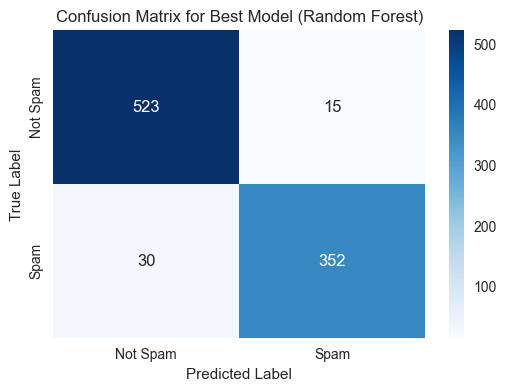

In [619]:
# TO DO: Print confusion matrix using a heatmap (1 mark)
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Best Model (Random Forest)")
plt.show()

### Questions (6 marks)
1. Which model did you select for part 5.2? How did it compare to the other models? 
1. Looking at the feature ranges, would a tree-based model or SVM make more sense for this dataset? Did using scaling for SVM improve the results? How did it perform compared to the random forest model?
1. In your opinion, is it better to focus on changing the decision threshold or changing the model to improve precision/recall results? Why?

*ANSWER HERE*

1. I chose the Random Forest model. This model had the highest training and validation accuracy at 0.97 and 0.94 respectively. This allowed for the most accurate model with the highest precision and recall scores. 

2. A tree-based model makes more sense for this dataset as SVM would require scaling due to the dataset we used. Scaling considerably improved the performance of the model boosting its training and validation accuracy from 72 and 71 to 95 and 93 respectively. Pre-scaling, SVC did not perform anywhere near as well as the tree model, but once it was scaled it performed with very similar results.

3. Personally I believe choosing a better model is more important than trying to change the decision threshold as the model would have a much larger impact. As shown previously, the unscaled SVC model was not the correct model as it had low scores, so changing the decision boundary in that case would most likely have less of an impact than changing to a tree-based model which does not require scaling.

### Process Description (4 marks)
Please describe the process you used to create your code for parts A and B. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*
1. This code was created by myself, using the documentation from scikit learn and GeeksforGeeks to understand functions and parameters
2. The steps were completed in sequential order from 1 to 5. This was done as it was straight forward and necessary to compare the models correctly
3. Generative AI was used to better explain functions which I did not understand from reading the documentation. Using prompts such as "What do the _____ parameters mean in _____ function?" Sometimes the AI would give hallucinations and incorrectly using the code compared to the documentation, causing confusion.
4. I did not face as many challenges as the previous lab. Knowing the websites for the documentation and being more familiar with the functions as they were previously used in the lab helped me complete these steps much quicker and have a more thorough understanding of each step. The challenges I faced such as how to change the threshold were quickly solved by checking the documentation and reading what is returned by the functions.

## Part 2: Regression (18 marks)

For this section, we will be using the concrete example from yellowbrick. Since this dataset is highly non-linear, we will be evaluating how well different tree-based models work for this case.

You will need to repeat the steps from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be imported using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [620]:
# TO DO: Import concrete dataset from yellowbrick library (1 mark)
from yellowbrick.datasets.loaders import load_concrete

X, y = load_concrete()

if(X is None or y is None):
    print("Error loading the dataset")
else:
    print(f"The type of X is: {type(X)} and has size: {X.size} in the shape: {X.shape}")
    print(f"The type of X is: {type(y)} and has size: {y.size} in the shape: {y.shape}")

The type of X is: <class 'pandas.core.frame.DataFrame'> and has size: 8240 in the shape: (1030, 8)
The type of X is: <class 'pandas.core.series.Series'> and has size: 1030 in the shape: (1030,)


### Step 2: Data Processing (1 mark)

Check if there are any missing values and fill them in if necessary. Remove any non-numeric columns.

In [621]:
# TO DO: Process the data - fill-in any missing values and remove any non-numeric columns (0.5 marks)
missing_x = X.isnull().sum().sum()
missing_y = y.isnull().sum()

print(f"There are {missing_x} values missing in X") #Appears to have no missing values, therefore do not need to fill-in anything
print(f"There are {missing_y} values missing in y") #Appears to have no missing values, therefore do not need to fill-in anything
print("-----------------")
print(X) #To check features - Appears to have no non-numeric columns
print("-----------------")
print(y) #To check targets - Appears to have no non-numeric columns

There are 0 values missing in X
There are 0 values missing in y
-----------------
      cement   slag    ash  water  splast  coarse   fine  age
0      540.0    0.0    0.0  162.0     2.5  1040.0  676.0   28
1      540.0    0.0    0.0  162.0     2.5  1055.0  676.0   28
2      332.5  142.5    0.0  228.0     0.0   932.0  594.0  270
3      332.5  142.5    0.0  228.0     0.0   932.0  594.0  365
4      198.6  132.4    0.0  192.0     0.0   978.4  825.5  360
...      ...    ...    ...    ...     ...     ...    ...  ...
1025   276.4  116.0   90.3  179.6     8.9   870.1  768.3   28
1026   322.2    0.0  115.6  196.0    10.4   817.9  813.4   28
1027   148.5  139.4  108.6  192.7     6.1   892.4  780.0   28
1028   159.1  186.7    0.0  175.6    11.3   989.6  788.9   28
1029   260.9  100.5   78.3  200.6     8.6   864.5  761.5   28

[1030 rows x 8 columns]
-----------------
0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026 

The concrete data should already be split into the feature matrix and target vector. Inspect the first few columns of the feature matrix.

In [622]:
# TO DO: Inspect the first few rows of the feature matrix (0.5 marks)
print(X.head())

   cement   slag  ash  water  splast  coarse   fine  age
0   540.0    0.0  0.0  162.0     2.5  1040.0  676.0   28
1   540.0    0.0  0.0  162.0     2.5  1055.0  676.0   28
2   332.5  142.5  0.0  228.0     0.0   932.0  594.0  270
3   332.5  142.5  0.0  228.0     0.0   932.0  594.0  365
4   198.6  132.4  0.0  192.0     0.0   978.4  825.5  360


### Step 3: Implement and Validate Machine Learning Model (7 marks)

1. Import any required libraries
1. Split the data into training and testing sets (testing data should be 10% of the dataset)
1. Train and validate the Decision Tree model with the training set (use `cross_validate()` with `cv=5` and `scoring='r2'`)
    1. Test five different max_depth values: 3, 5, 7, 9 and 11
1. Print the training and validation accuracy for the best max_depth results. Which max_depth gave us the best results?

**Note**: for any random state parameters, you can use random_state = 0

In [623]:
# Split training and testing sets (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [624]:
# Test max_depths of 3, 5, 7, 9 and 11 for a decision tree model to find the best results (3 marks)
# Hint: It is easier if you use a loop to evaluate each max_depth
from sklearn.tree import DecisionTreeRegressor

max_depths = [3, 5, 7, 9, 11]
for i in range(len(max_depths)):
    tree_max_depth = max_depths[i]
    model = DecisionTreeRegressor(random_state=0, max_depth=tree_max_depth)
    cross_val_tree = cross_validate(model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
    tree_train_acc = cross_val_tree['train_score'].mean()
    tree_val_acc = cross_val_tree['test_score'].mean()
    print(f"Decision Tree with max depth of {tree_max_depth}")
    print(f"Training accuracy: {tree_train_acc}")
    print(f"Validation accuracy: {tree_val_acc}")
    print("---------------------")

print("The tree with the best max_depth results is 11")

Decision Tree with max depth of 3
Training accuracy: 0.6369254623206089
Validation accuracy: 0.5728232818866036
---------------------
Decision Tree with max depth of 5
Training accuracy: 0.8212954119214
Validation accuracy: 0.7107858594921725
---------------------
Decision Tree with max depth of 7
Training accuracy: 0.9179040300034209
Validation accuracy: 0.7780844886481686
---------------------
Decision Tree with max depth of 9
Training accuracy: 0.9678620018390293
Validation accuracy: 0.8115408757428465
---------------------
Decision Tree with max depth of 11
Training accuracy: 0.9884825233465044
Validation accuracy: 0.8090488209607269
---------------------
The tree with the best max_depth results is 11


Now that we have found the best results for a decision tree model with this dataset, let's compare this result to using `Random_Forest` or `GradientBoosting`. For both models, use `max_depth=5`.

In [625]:
# TO DO: Calculate and display training and validation accuracies for both models using default hyperparameters (3 marks)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

random_forest = RandomForestRegressor(max_depth=5, random_state=0)
gradient = GradientBoostingRegressor(max_depth=5, random_state=0)

random_forest.fit(X_train, y_train)
gradient.fit(X_train, y_train)

rf_train_pred = random_forest.predict(X_train)
rf_val_pred = random_forest.predict(X_test)

gradient_train_pred = gradient.predict(X_train)
gradient_val_pred = gradient.predict(X_test)

rf_train_acc = r2_score(y_train, rf_train_pred)
rf_val_acc = r2_score(y_test, rf_val_pred)

gradient_train_acc = r2_score(y_train, gradient_train_pred)
gradient_val_acc = r2_score(y_test, gradient_val_pred)

print(f"Random Forest - Training Accuracy: {rf_train_acc:.2f}, Validation Accuracy: {rf_val_acc:.2f}")
print(f"Gradient Boosting - Training Accuracy: {gradient_train_acc:.2f}, Validation Accuracy: {gradient_val_acc:.2f}")

Random Forest - Training Accuracy: 0.88, Validation Accuracy: 0.86
Gradient Boosting - Training Accuracy: 0.99, Validation Accuracy: 0.92


Which model gave us the best results? Use that model for the next step.

### Step 4: Test Model (1 mark)

Select the best model and calculate the testing accuracy using the R^2 score

In [626]:
# TO DO: Find test score using best model (1 mark)
# I am confused, is this not doing the same thing that was previously done in the last cell?
gradient_test_pred = gradient.predict(X_test)
gradient_test_acc = r2_score(y_test, gradient_test_pred)

print(f"Final Model: Gradient Boosting")
print(f"Test Accuracy (R²): {gradient_test_acc:.2f}")

Final Model: Gradient Boosting
Test Accuracy (R²): 0.92


### Questions (4 marks)
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*
1. I would select the GradientBoosting model. This selection is made based on the fact that the model has the higher training and testing accuracies at 99 and 93 respectively. Comparing this to the random forest, that model only achieved 88 and 86 for its scores. The Gradient model seems to be the better choice.
2. I would play around with the n_estimators hyperparameter, increasing the value. Once this is optimized, it could ensure we have a higher accuracy compared to the default 100 n_estimator value. Another option is specifically for the GradientBoosting, the learning_rate parameter can be changed and optimized to potentially increase the validation accuracy

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*
1. Source code was originally written and was verified with the documentation from scikit-learn and GeeksforGeeks
2. The steps were completed in order, allowing for an organized understanding of the purpose and also as following steps built upon previous ones
3. Generative AI was used to understand functions again, using similar prompts as in Part 1. Prompts such as "Does changing ____ hyperparameter in ____ function help improve the recall?" which were supported using class notes as well 
4. I did nto face challenges in this part of the lab. As previously stated, documentation helped any confusion and allowed me to understand what to do for each step

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*
I really enjoyed being able to explore multiple models on the same dataset to be able to see which one worked better. Learning how to choose the correct model was highlighted in this lab and I believe it's of great importance

Something I found confusing was some steps seemed to repeat. For example there is a cell near the beginning asking us to split the dataset and then later it asks us to split it again, even if we never used the first split. Another thing is the LogisticRegression model needed to have fit_intercept=False as the intercept was fitting to -1.66 which was causing confusion when changing it to -1 as it was increasing it when I meant to decrease it.